<a href="https://colab.research.google.com/github/janardhana-vels/AI_ML/blob/master/Blod_level_2_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os


In [0]:
os.getcwd()

'/content'

In [0]:
os.chdir("/content/drive/My Drive/BOLDLEVEL2/")

In [0]:
os.getcwd()

'/content/drive/My Drive/BOLDLEVEL2'

In [0]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/BOLDLEVEL2/Iris.csv')

In [0]:
print(df)

      Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]


In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error




In [0]:
print(os.getcwd())

/content/drive/My Drive/BOLDLEVEL2


In [0]:
df1 = pd.read_csv('/content/drive/My Drive/DataSets/GPA Vs SAT.csv')
print(df1.head())

    SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83


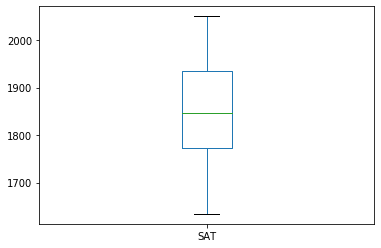

In [0]:
df1['SAT'].plot(kind='box')

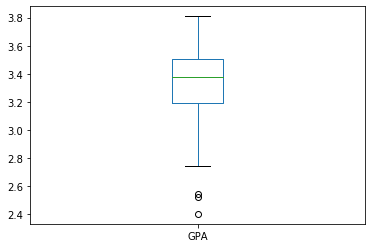

In [0]:
df1['GPA'].plot(kind='box')

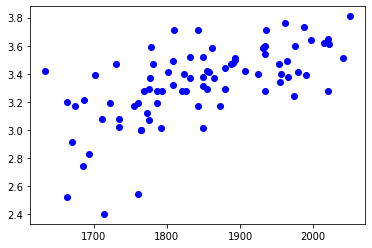

In [0]:
plt.plot(df1.SAT,df1.GPA,'bo')

In [0]:
df1.corr(method ='pearson') 


,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


In [0]:
df1.corr(method ='kendall') 


,SAT,GPA
SAT,1.000000,0.490005
GPA,0.490005,1.000000


In [0]:
df1.corr()

,SAT,GPA
SAT,1.000000,0.637184
GPA,0.637184,1.000000


In [0]:
X_train,X_test,y_train,y_test=train_test_split(np.asarray(df1['SAT']),np.asarray(df1['GPA']),test_size=0.2,random_state=123)

In [0]:
print(df1.shape)
print("\n")
print(X_train.shape)
print("\n")
print(X_test.shape)
print("\n")
print(y_train.shape)
print("\n")
print(y_test.shape)

(84, 2)


(67,)


(17,)


(67,)


(17,)


change the dimension 1 to 2 2d

In [0]:
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)

X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [0]:
print(df1.shape)
print("\n")
print(X_train.shape)
print("\n")
print(X_test.shape)
print("\n")
print(y_train.shape)
print("\n")
print(y_test.shape)


(84, 2)


(67, 1)


(17, 1)


(67, 1)


(17, 1)


In [0]:
## Instantiating the function, with normalize=True implies that when this is applied
## on the data, the X variable is normalized
lin_model=LinearRegression(normalize=True)
lin_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

As mentioned in the lectures, to understand how good the fit, we look at the metrics R-square

    If the fit is perfect and no errors (actuals= predicted) then the R-square value will be 1 and if the fit is not perfect and there are high errors then the R-square value will be closer to zero. When we model a linear regression, we see that the R-square value is closer to 1 which indicates that it is a better fit.
    However, it is to be rememebered that R-square is only one metric and ultimately we need to check how well the model performed on an unseen dataset. If R-square is good and the predictions on unseen data are way-off, then we may not use that model


In [0]:
print("R-Square is:",lin_model.score(X_train,y_train))



R-Square is: 0.4620496266440639


In [0]:
print("Coeff of SAT is:",lin_model.coef_)


Coeff of SAT is: [[0.00175421]]


In [0]:
print("Intercept is:",lin_model.intercept_)


Intercept is: [0.08665701]


In [0]:
## Predict the revenue generated on the test data using predict function
preds=lin_model.predict(X_test)
preds



array([[3.47754069],
       [3.04600557],
       [3.05653082],
       [3.48280332],
       [3.40737238],
       [3.20563848],
       [3.58980999],
       [3.51437906],
       [3.4792949 ],
       [3.31966199],
       [3.23019739],
       [3.46350703],
       [3.33194145],
       [3.34071249],
       [3.12143651],
       [3.30036571],
       [3.54946321]])

In [0]:
y_test = y_test.reshape(-1,)
preds = preds.reshape(-1,)
diff=pd.DataFrame({'Acutal':y_test,'Predicted':preds})

In [0]:
diff

,Acutal,Predicted
0,3.59,3.477541
1,3.21,3.046006
2,2.83,3.056531
3,3.71,3.482803
4,3.50,3.407372
5,3.59,3.205638
6,3.64,3.589810
7,3.34,3.514379
8,3.28,3.479295
9,3.71,3.319662


In [0]:
diff['calc']=0.00175421*np.array(X_test).reshape(-1,)+0.08665701

In [0]:
diff

,Acutal,Predicted,calc
0,3.59,3.477541,3.477545
1,3.21,3.046006,3.046009
2,2.83,3.056531,3.056535
3,3.71,3.482803,3.482808
4,3.50,3.407372,3.407377
5,3.59,3.205638,3.205642
6,3.64,3.589810,3.589814
7,3.34,3.514379,3.514383
8,3.28,3.479295,3.479299
9,3.71,3.319662,3.319666


In [0]:
mean_squared_error(diff['Acutal'],diff['Predicted'])Y_pred = linear_regressor.predict(X)  # make predictions


0.055985577920230685

In [0]:
np.mean(mean_squared_error(diff['Acutal'],diff['Predicted']))

0.055985577920230685

In [0]:
## Statndardization of the data
x_std= (X_train-X_train.mean())/X_train.std()
x_test_std= (X_test-X_train.mean())/X_train.std()



In [0]:
model_sm=sm.OLS(y_train,x_std).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):             -0.012
Method:                 Least Squares   F-statistic:                             0.2067
Date:                Sun, 23 Feb 2020   Prob (F-statistic):                       0.651
Time:                        09:54:35   Log-Likelihood:                         -175.54
No. Observations:                  67   AIC:                                      353.1
Df Residuals:                      66   BIC:                                      355.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1860      0.409      0.455      0.651      -0.631       1.003
==============================================================================
Omnibus:                       17.145   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.026
Skew:                          -0.927   Prob(JB):                     1.35e-06
Kurtosis:                       5.499   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""